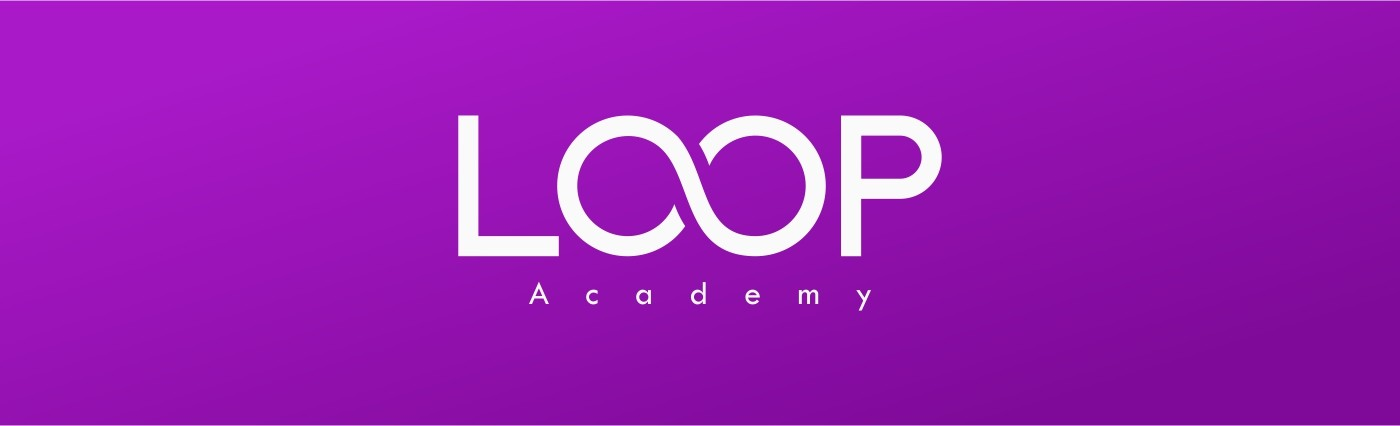

some part of this notebook are copied from Jose Marcial Portilla works.

# Loading Real Image Data
So far we've only worked with toy datasets (MNIST, CIFAR-10) conveniently packaged by torchvision, where every image has the same size and shape. Now let's learn the real deal, and work from a varied collection of .jpg files.

For this section we'll be working with a version of the Cats vs. Dogs dataset inspired by a classic <a href='https://www.kaggle.com/c/dogs-vs-cats'>Kaggle competition</a>.<br>
<br>The images are similar to ones available from the <a href='http://www.image-net.org/'>ImageNet</a> database.

We have organized the files into train and test folders, and further divided the images into CAT and DOG subfolders. In this way the file path contains the label.

### Image files directory tree
<pre>.
└── Data
    └── CATS_DOGS
        ├── test
        │   ├── CAT
        │   │   ├── 9374.jpg
        │   │   ├── 9375.jpg
        │   │   └── ... (3,126 files)
        │   └── DOG
        │       ├── 9374.jpg
        │       ├── 9375.jpg
        │       └── ... (3,125 files)       
        │           
        └── train
            ├── CAT
            │   ├── 0.jpg
            │   ├── 1.jpg
            │   └── ... (9,371 files)
            └── DOG
                ├── 0.jpg
                ├── 1.jpg
                └── ... (9,372 files)</pre>

## load data from Kaggle

<a href='https://www.analyticsvidhya.com/blog/2021/06/how-to-load-kaggle-datasets-directly-into-google-colab/'>How to Load Kaggle Datasets Directly into Google Colab?</a>

In [1]:
# Install the Kaggle library
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
! mkdir ~/.kaggle

In [3]:
! cp kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
! kaggle competitions download -c dogs-vs-cats

 98% 794M/812M [00:02<00:00, 255MB/s]
100% 812M/812M [00:02<00:00, 286MB/s]


In [6]:
! dir ../content

dogs-vs-cats.zip  kaggle.json  sample_data


In [7]:
! mkdir ../content/Data
! mkdir ../content/Data/CATS_DOGS

In [8]:
! dir ../content/Data

CATS_DOGS


In [9]:
! unzip dogs-vs-cats.zip

Archive:  dogs-vs-cats.zip
  inflating: sampleSubmission.csv    
  inflating: test1.zip               
  inflating: train.zip               


In [10]:
! unzip train.zip -d ../content/Data/CATS_DOGS

Streaming output truncated to the last 5000 lines.
  inflating: ../content/Data/CATS_DOGS/train/dog.5499.jpg  
  inflating: ../content/Data/CATS_DOGS/train/dog.55.jpg  
  inflating: ../content/Data/CATS_DOGS/train/dog.550.jpg  
  inflating: ../content/Data/CATS_DOGS/train/dog.5500.jpg  
  inflating: ../content/Data/CATS_DOGS/train/dog.5501.jpg  
  inflating: ../content/Data/CATS_DOGS/train/dog.5502.jpg  
  inflating: ../content/Data/CATS_DOGS/train/dog.5503.jpg  
  inflating: ../content/Data/CATS_DOGS/train/dog.5504.jpg  
  inflating: ../content/Data/CATS_DOGS/train/dog.5505.jpg  
  inflating: ../content/Data/CATS_DOGS/train/dog.5506.jpg  
  inflating: ../content/Data/CATS_DOGS/train/dog.5507.jpg  
  inflating: ../content/Data/CATS_DOGS/train/dog.5508.jpg  
  inflating: ../content/Data/CATS_DOGS/train/dog.5509.jpg  
  inflating: ../content/Data/CATS_DOGS/train/dog.551.jpg  
  inflating: ../content/Data/CATS_DOGS/train/dog.5510.jpg  
  inflating: ../content/Data/CATS_DOGS/train/dog.5511

In [11]:
import glob 
paths = glob.glob('../content/Data/CATS_DOGS/train/*.jpg')
paths[:5]

['../content/Data/CATS_DOGS/train/dog.5060.jpg',
 '../content/Data/CATS_DOGS/train/cat.2017.jpg',
 '../content/Data/CATS_DOGS/train/cat.4450.jpg',
 '../content/Data/CATS_DOGS/train/cat.8028.jpg',
 '../content/Data/CATS_DOGS/train/cat.2629.jpg']

In [12]:
cat_images = list(filter(lambda x : x.split('/')[-1].split('.')[0] == 'cat', paths))
dog_images = list(filter(lambda x : x.split('/')[-1].split('.')[0] == 'dog', paths))

In [13]:
cat_images[:5]

['../content/Data/CATS_DOGS/train/cat.2017.jpg',
 '../content/Data/CATS_DOGS/train/cat.4450.jpg',
 '../content/Data/CATS_DOGS/train/cat.8028.jpg',
 '../content/Data/CATS_DOGS/train/cat.2629.jpg',
 '../content/Data/CATS_DOGS/train/cat.11806.jpg']

In [14]:
dog_images[:5]

['../content/Data/CATS_DOGS/train/dog.5060.jpg',
 '../content/Data/CATS_DOGS/train/dog.1164.jpg',
 '../content/Data/CATS_DOGS/train/dog.9286.jpg',
 '../content/Data/CATS_DOGS/train/dog.2466.jpg',
 '../content/Data/CATS_DOGS/train/dog.5653.jpg']

In [15]:
! mkdir ../content/Data/CATS_DOGS/train/DOG
! mkdir ../content/Data/CATS_DOGS/train/CAT
! mkdir ../content/Data/CATS_DOGS/test
! mkdir ../content/Data/CATS_DOGS/test/DOG
! mkdir ../content/Data/CATS_DOGS/test/CAT

In [16]:
# split cat,dog data to train,test
train_size_cat = int(len(cat_images)*0.7)
print(train_size_cat)
train_size_dog = int(len(dog_images)*0.7)
print(train_size_dog)

8750
8750


In [17]:
import shutil

for path in cat_images[:train_size_cat]:
    img_name = path.split('/')[-1].split('.')[1]
    dist_path = f'../content/Data/CATS_DOGS/train/CAT/{img_name}.jpg'
    shutil.move(path, dist_path)

for path in cat_images[train_size_cat:]:
    img_name = path.split('/')[-1].split('.')[1]
    dist_path = f'../content/Data/CATS_DOGS/test/CAT/{img_name}.jpg'
    shutil.move(path, dist_path)

for path in dog_images[:train_size_dog]:
    img_name = path.split('/')[-1].split('.')[1]
    dist_path = f'../content/Data/CATS_DOGS/train/DOG/{img_name}.jpg'
    shutil.move(path, dist_path)

for path in dog_images[train_size_dog:]:
    img_name = path.split('/')[-1].split('.')[1]
    dist_path = f'../content/Data/CATS_DOGS/test/DOG/{img_name}.jpg'
    shutil.move(path, dist_path)

## Perform standard imports

In [18]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models # add models to the list
from torchvision.utils import make_grid
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

## Define transforms
In the previous section we looked at a variety of transforms available for data augmentation (rotate, flip, etc.) and normalization.<br>
Here we'll combine the ones we want, including the <a href='https://discuss.pytorch.org/t/normalization-in-the-mnist-example/457/22'>recommended normalization parameters</a> for mean and std per channel.

In [19]:
train_transform = transforms.Compose([
        transforms.RandomRotation(10),      # rotate +/- 10 degrees
        transforms.RandomHorizontalFlip(),  # reverse 50% of images
        transforms.Resize(224),             # resize shortest side to 224 pixels
        transforms.CenterCrop(224),         # crop longest side to 224 pixels at center
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ])

test_transform = transforms.Compose([
        transforms.Resize(224),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ])

## Prepare train and test sets, loaders
We're going to take advantage of a built-in torchvision dataset tool called <a href='https://pytorch.org/docs/stable/torchvision/datasets.html#imagefolder'><tt><strong>ImageFolder</strong></tt></a>.

In [20]:
root = '../content/Data/CATS_DOGS'

train_data = datasets.ImageFolder(os.path.join(root, 'train'), transform=train_transform)
test_data = datasets.ImageFolder(os.path.join(root, 'test'), transform=test_transform)

torch.manual_seed(42)
train_loader = DataLoader(train_data, batch_size=10, shuffle=True)
test_loader = DataLoader(test_data, batch_size=10, shuffle=True)

class_names = train_data.classes

print(class_names)
print(f'Training images available: {len(train_data)}')
print(f'Testing images available:  {len(test_data)}')

['CAT', 'DOG']
Training images available: 17500
Testing images available:  7500


## Display a batch of images
To verify that the training loader selects cat and dog images at random, let's show a batch of loaded images.<br>
Recall that imshow clips pixel values <0, so the resulting display lacks contrast. We'll apply a quick inverse transform to the input tensor so that images show their "true" colors.

Label: [1 1 1 0 0 1 1 0 0 1]
Class: DOG DOG DOG CAT CAT DOG DOG CAT CAT DOG


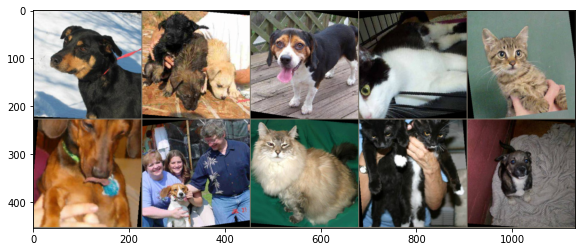

In [21]:
# Grab the first batch of 10 images
for images,labels in train_loader: 
    break

# Print the labels
print('Label:', labels.numpy())
print('Class:', *np.array([class_names[i] for i in labels]))

im = make_grid(images, nrow=5)  # the default nrow is 8

# Inverse normalize the images
inv_normalize = transforms.Normalize(
    mean=[-0.485/0.229, -0.456/0.224, -0.406/0.225],
    std=[1/0.229, 1/0.224, 1/0.225]
)
im_inv = inv_normalize(im)

# Print the images
plt.figure(figsize=(12,4))
plt.imshow(np.transpose(im_inv.numpy(), (1, 2, 0)));

## Define the model
We'll start by using a model similar to the one we applied to the CIFAR-10 dataset, except that here we have a binary classification (2 output channels, not 10). Also, we'll add another set of convolution/pooling layers.

In [22]:
class ConvolutionalNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 3, 1)
        self.conv2 = nn.Conv2d(6, 16, 3, 1)
        self.fc1 = nn.Linear(54*54*16, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 2)

    def forward(self, X):
        X = F.relu(self.conv1(X))
        X = F.max_pool2d(X, 2, 2)
        X = F.relu(self.conv2(X))
        X = F.max_pool2d(X, 2, 2)
        X = X.view(-1, 54*54*16)
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)
        return F.log_softmax(X, dim=1)

<div class="alert alert-info"><strong>Why <tt>(54x54x16)</tt>?</strong><br>
With 224 pixels per side, the kernels and pooling layers result in $\;(((224-2)/2)-2)/2 = 54.5\;$ which rounds down to 54 pixels per side.</div>

### Instantiate the model, define loss and optimization functions
We're going to call our model "CNNmodel" to differentiate it from an "AlexNetmodel" we'll use later.

In [23]:
torch.manual_seed(101)
CNNmodel = ConvolutionalNetwork()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(CNNmodel.parameters(), lr=0.001)
CNNmodel

ConvolutionalNetwork(
  (conv1): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=46656, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=2, bias=True)
)

### Looking at the trainable parameters

In [24]:
def count_parameters(model):
    params = [p.numel() for p in model.parameters() if p.requires_grad]
    for item in params:
        print(f'{item:>8}')
    print(f'________\n{sum(params):>8}')

In [25]:
count_parameters(CNNmodel)

     162
       6
     864
      16
 5598720
     120
   10080
      84
     168
       2
________
 5610222


## Train the model
In the interests of time, we'll limit the number of training batches to 800, and the number of testing batches to 300. We'll train the model on 8000 of 18743 available images, and test it on 3000 out of 6251 images.

In [26]:
import time
start_time = time.time()

epochs = 3

max_trn_batch = 400
max_tst_batch = 100

train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0
    
    # Run the training batches
    for b, (X_train, y_train) in enumerate(train_loader):
        
        # Limit the number of batches
        if b == max_trn_batch:
            break
        b+=1
        
        # Apply the model
        y_pred = CNNmodel(X_train)
        loss = criterion(y_pred, y_train)
 
        # Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr
        
        # Update parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Print interim results
        if b%200 == 0:
            print(f'epoch: {i:2}  batch: {b:4} [{10*b:6}/8000]  loss: {loss.item():10.8f}  \
accuracy: {trn_corr.item()*100/(10*b):7.3f}%')

    train_losses.append(loss.item())
    train_correct.append(trn_corr)

    # Run the testing batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):
            # Limit the number of batches
            if b == max_tst_batch:
                break

            # Apply the model
            y_val = CNNmodel(X_test)

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1] 
            tst_corr += (predicted == y_test).sum()

    loss = criterion(y_val, y_test)
    test_losses.append(loss.item())
    test_correct.append(tst_corr)

print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed

epoch:  0  batch:  200 [  2000/8000]  loss: 0.70816696  accuracy:  56.450%
epoch:  0  batch:  400 [  4000/8000]  loss: 0.46323776  accuracy:  60.325%
epoch:  1  batch:  200 [  2000/8000]  loss: 0.52298009  accuracy:  65.500%
epoch:  1  batch:  400 [  4000/8000]  loss: 0.66154313  accuracy:  67.150%
epoch:  2  batch:  200 [  2000/8000]  loss: 0.48187551  accuracy:  69.450%
epoch:  2  batch:  400 [  4000/8000]  loss: 0.69541711  accuracy:  70.375%

Duration: 247 seconds


## Save the trained model

In [27]:
torch.save(CNNmodel.state_dict(), 'CustomImageCNNModel.pt')

## Evaluate model performance

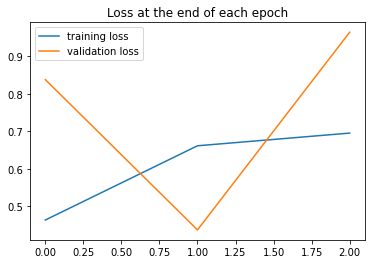

In [28]:
plt.plot(train_losses, label='training loss')
plt.plot(test_losses, label='validation loss')
plt.title('Loss at the end of each epoch')
plt.legend();

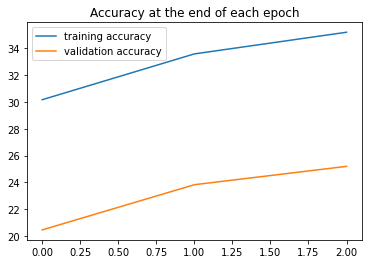

In [29]:
plt.plot([t/80 for t in train_correct], label='training accuracy')
plt.plot([t/30 for t in test_correct], label='validation accuracy')
plt.title('Accuracy at the end of each epoch')
plt.legend();

In [30]:
print(test_correct)
print(f'Test accuracy: {test_correct[-1].item()*100/3000:.3f}%')

[tensor(614), tensor(715), tensor(756)]
Test accuracy: 25.200%


## Download a pretrained model
Torchvision has a number of proven models available through <a href='https://pytorch.org/docs/stable/torchvision/models.html#classification'><tt><strong>torchvision.models</strong></tt></a>:
<ul>
<li><a href="https://arxiv.org/abs/1404.5997">AlexNet</a></li>
<li><a href="https://arxiv.org/abs/1409.1556">VGG</a></li>
<li><a href="https://arxiv.org/abs/1512.03385">ResNet</a></li>
<li><a href="https://arxiv.org/abs/1602.07360">SqueezeNet</a></li>
<li><a href="https://arxiv.org/abs/1608.06993">DenseNet</a></li>
<li><a href="https://arxiv.org/abs/1512.00567">Inception</a></li>
<li><a href="https://arxiv.org/abs/1409.4842">GoogLeNet</a></li>
<li><a href="https://arxiv.org/abs/1807.11164">ShuffleNet</a></li>
<li><a href="https://arxiv.org/abs/1801.04381">MobileNet</a></li>
<li><a href="https://arxiv.org/abs/1611.05431">ResNeXt</a></li>
</ul>
These have all been trained on the <a href='http://www.image-net.org/'>ImageNet</a> database of images. Our only task is to reduce the output of the fully connected layers from (typically) 1000 categories to just 2.

To access the models, you can construct a model with random weights by calling its constructor:<br>
<pre>resnet18 = models.resnet18()</pre>
You can also obtain a pre-trained model by passing pretrained=True:<br>
<pre>resnet18 = models.resnet18(pretrained=True)</pre>
All pre-trained models expect input images normalized in the same way, i.e. mini-batches of 3-channel RGB images of shape (3 x H x W), where H and W are expected to be at least 224. The images have to be loaded in to a range of [0, 1] and then normalized using mean = [0.485, 0.456, 0.406] and std = [0.229, 0.224, 0.225].

Feel free to investigate the different models available. Each one will be downloaded to a cache directory the first time they're accessed - from then on they'll be available locally.

For its simplicity and effectiveness, we'll use AlexNet:

In [31]:
AlexNetmodel = models.alexnet(pretrained=True)
AlexNetmodel

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

<div class="alert alert-info">This model uses <a href='https://pytorch.org/docs/master/nn.html#torch.nn.AdaptiveAvgPool2d'><tt><strong>torch.nn.AdaptiveAvgPool2d(<em>output_size</em>)</strong></tt></a> to convert the large matrix coming out of the convolutional layers to a (6x6)x256 matrix being fed into the fully connected layers.</div>

## Freeze feature parameters
We want to freeze the pre-trained weights & biases. We set <tt>.requires_grad</tt> to False so we don't backprop through them.

In [32]:
for param in AlexNetmodel.parameters():
    param.requires_grad = False

## Modify the classifier
Next we need to modify the fully connected layers to produce a binary output. The section is labeled "classifier" in the AlexNet model.<br>
Note that when we assign new layers, their parameters default to <tt>.requires_grad=True</tt>.

In [33]:
torch.manual_seed(42)
AlexNetmodel.classifier = nn.Sequential(nn.Linear(9216, 1024),
                                 nn.ReLU(),
                                 nn.Dropout(0.4),
                                 nn.Linear(1024, 2),
                                 nn.LogSoftmax(dim=1))
AlexNetmodel

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Linear(in_features=9216, out_features=1024, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.4, 

In [34]:
# These are the TRAINABLE parameters:
count_parameters(AlexNetmodel)

 9437184
    1024
    2048
       2
________
 9440258


## Define loss function & optimizer
We only want to optimize the classifier parameters, as the feature parameters are frozen.

In [35]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(AlexNetmodel.classifier.parameters(), lr=0.001)

## Train the model
Remember, we're only training the fully connected layers. The convolutional layers have fixed weights and biases. For this reason, we only need to run one epoch.

In [36]:
import time
start_time = time.time()

epochs = 1

max_trn_batch = 800
max_tst_batch = 300

train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0
    
    # Run the training batches
    for b, (X_train, y_train) in enumerate(train_loader):
        if b == max_trn_batch:
            break
        b+=1
        
        # Apply the model
        y_pred = AlexNetmodel(X_train)
        loss = criterion(y_pred, y_train)
 
        # Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr
        
        # Update parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Print interim results
        if b%200 == 0:
            print(f'epoch: {i:2}  batch: {b:4} [{10*b:6}/8000]  loss: {loss.item():10.8f}  \
accuracy: {trn_corr.item()*100/(10*b):7.3f}%')

    train_losses.append(loss.item())
    train_correct.append(trn_corr)

    # Run the testing batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):
            if b == max_tst_batch:
                break

            # Apply the model
            y_val = AlexNetmodel(X_test)

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1] 
            tst_corr += (predicted == y_test).sum()

    loss = criterion(y_val, y_test)
    test_losses.append(loss.item())
    test_correct.append(tst_corr)

print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed

epoch:  0  batch:  200 [  2000/8000]  loss: 0.24894750  accuracy:  88.250%
epoch:  0  batch:  400 [  4000/8000]  loss: 0.01401779  accuracy:  90.875%
epoch:  0  batch:  600 [  6000/8000]  loss: 0.02686363  accuracy:  91.567%
epoch:  0  batch:  800 [  8000/8000]  loss: 0.66992706  accuracy:  92.263%

Duration: 343 seconds


In [37]:
print(test_correct)
print(f'Test accuracy: {test_correct[-1].item()*100/3000:.3f}%')

[tensor(2836)]
Test accuracy: 94.533%


## Run a new image through the model
We can also pass a single image through the model to obtain a prediction.<br>
Pick a number from 0 to 6250, assign it to "x", and we'll use that value to select an image from the Cats and Dogs test set.

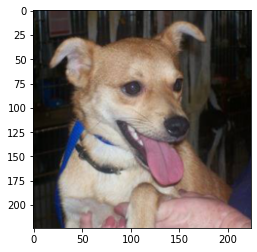

In [47]:
x = 5000
im = inv_normalize(test_data[x][0])
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)));

In [48]:
test_data[x][0].shape

torch.Size([3, 224, 224])

In [49]:
# CNN Model Prediction:

CNNmodel.eval()
with torch.no_grad():
    new_pred = CNNmodel(test_data[x][0].view(1,3,224,224)).argmax()
print(f'Predicted value: {new_pred.item()} {class_names[new_pred.item()]}')

Predicted value: 0 CAT


In [50]:
# AlexNet Model Prediction:

AlexNetmodel.eval()
with torch.no_grad():
    new_pred = AlexNetmodel(test_data[x][0].view(1,3,224,224)).argmax()
print(f'Predicted value: {new_pred.item()} {class_names[new_pred.item()]}')

Predicted value: 1 DOG
